# tensorFlow的结构
    1，建立神经网络结构
    2，将数据放在结构中
    3，由框架自动处理
    4，在gradients中处理数据
    5，完善后的数据在下一次的tensorFlow中进行处理，进行神经网络的改善和进步

### 输出训练之后的参数
    每20次输出1次

In [2]:
import tensorflow as tf

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [4]:
#创造数据
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*0.1+0.3
x_data,y_data

(array([ 0.19579343,  0.72436875,  0.69387138,  0.40486738,  0.55837297,
         0.73910618,  0.44471589,  0.60821116,  0.14485595,  0.23394473,
         0.29154092,  0.16761634,  0.44784054,  0.39063498,  0.18220773,
         0.6783905 ,  0.19799906,  0.51648104,  0.5148682 ,  0.0263503 ,
         0.03464781,  0.30286795,  0.49829039,  0.63709968,  0.19121809,
         0.11474763,  0.78562182,  0.11447117,  0.94364995,  0.9910937 ,
         0.50445145,  0.46738717,  0.9630819 ,  0.51851553,  0.61054629,
         0.02225417,  0.87651283,  0.55983788,  0.13050681,  0.1998335 ,
         0.63900119,  0.4963212 ,  0.42797071,  0.38989627,  0.68395495,
         0.37652811,  0.33342493,  0.73347157,  0.29255325,  0.8171652 ,
         0.63194859,  0.7547819 ,  0.01285425,  0.81450605,  0.29437464,
         0.09817176,  0.00213785,  0.62281603,  0.86047482,  0.63737226,
         0.65687203,  0.89818305,  0.44890195,  0.57642752,  0.77428436,
         0.04045498,  0.34134009,  0.33068821,  0.9

In [9]:
#开始创建tensorflow结构
#可能weights是一个二维矩阵 从初始置提升至目标值
Weights = tf.Variable(tf.random_uniform([1],-1.0,1.0))
biases = tf.Variable(tf.zeros([1]))

y = Weights*x_data+biases
#计算差值
loss = tf.reduce_mean(tf.square(y-y_data))
#减少误差 提升准确度 梯度下降法 参数是学习率
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)
#初始化变量
init = tf.initialize_all_variables()


Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [10]:
print(Weights,biases)

Tensor("Variable_4/read:0", shape=(1,), dtype=float32) Tensor("Variable_5/read:0", shape=(1,), dtype=float32)


In [11]:
#神经网络的一次回话 init初始化的内容被激活 整个网络也就被激活了
session = tf.Session()
session.run(init)

for step in range(201):
    session.run(train)
    if step%20 == 0:
        print(step,session.run(Weights),session.run(biases))

0 [ 0.00855541] [ 0.46206868]
20 [ 0.06192054] [ 0.31942877]
40 [ 0.08950511] [ 0.30535468]
60 [ 0.09710757] [ 0.30147579]
80 [ 0.09920283] [ 0.30040672]
100 [ 0.09978029] [ 0.3001121]
120 [ 0.09993944] [ 0.30003092]
140 [ 0.09998333] [ 0.30000851]
160 [ 0.0999954] [ 0.30000237]
180 [ 0.09999873] [ 0.30000067]
200 [ 0.09999964] [ 0.30000019]


## 会话控制

In [12]:
#一行两列的例子
matrix1 = tf.constant([[3,3]])
matrix2 = tf.constant([[2],[2]])

In [13]:
#矩阵乘法 np.dot(m1,m2)
product = tf.matmul(matrix1,matrix2)

In [15]:
#方法1 每run一次 执行一次结构
sess2 = tf.Session()
result = sess2.run(product)
print(result)
sess2.close()

[[12]]


In [16]:
#方法2 自动关闭 与文件类似
with tf.Session() as sess2:
    result2 = sess2.run(product)
    print(result2)

[[12]]


## Variable 变量的学习

In [18]:
#使用tf.Variable
state = tf.Variable(0,name='counter')

In [19]:
state.name

'counter:0'

In [23]:
#常量
one = tf.constant(1)
new_value = tf.add(state,one)
update = tf.assign(state,new_value)

In [24]:
#初始化所有变量
init = tf.initialize_all_variables()
with tf.Session() as sess3:
    sess3.run(init)
    for _item in range(3):
        sess3.run(update)
        print(sess3.run(state))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
1
2
3


## placeHolder 传入值学习

In [26]:
#默认数据为float32形式 可以给定结构
#input2 = tf.placeholder(tf.float32,[2,2])
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

output = tf.mul(input1,input2)

In [28]:
with tf.Session() as sess4:
    print(sess4.run(output,feed_dict={input1:[7.],input2:[2.]}))

[ 14.]


在运行并使用结果时再使用值。则使用placeholder在使用时再进行赋值

# 激励函数

### 为什么需要激励函数？
    解决不能用线性方程所解决的问题。
    激励函数代表：sigmod 当神经网络低层时可随意使用激励函数。高层时需注意。
    将激活效应传递给下一层
    

#### 在tensorFlow中
    每一隐藏层加工完后将将要输出的值经过激励函数 再传递给下一层

## 添加神经网络层数

In [5]:
#注意添加偏置 如果没有偏置的化会导致 误差无法缩小
def add_layer(inputs,in_size,out_size,activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size,out_size]))
    biases = tf.Variable(tf.zeros([1,out_size])+0.1)
    Wx_plus_b = tf.matmul(inputs,Weights)+biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

## 建造神经网络

In [6]:
#-1,1区间有300个单位
x_data2 = np.linspace(-1,1,300)[:,np.newaxis]
#前两个参数为均值和方差
noise = np.random.normal(0,0.05,x_data2.shape)
y_data2 = np.square(x_data2)-0.5+noise

In [7]:
x_data2

array([[-1.        ],
       [-0.99331104],
       [-0.98662207],
       [-0.97993311],
       [-0.97324415],
       [-0.96655518],
       [-0.95986622],
       [-0.95317726],
       [-0.94648829],
       [-0.93979933],
       [-0.93311037],
       [-0.9264214 ],
       [-0.91973244],
       [-0.91304348],
       [-0.90635452],
       [-0.89966555],
       [-0.89297659],
       [-0.88628763],
       [-0.87959866],
       [-0.8729097 ],
       [-0.86622074],
       [-0.85953177],
       [-0.85284281],
       [-0.84615385],
       [-0.83946488],
       [-0.83277592],
       [-0.82608696],
       [-0.81939799],
       [-0.81270903],
       [-0.80602007],
       [-0.7993311 ],
       [-0.79264214],
       [-0.78595318],
       [-0.77926421],
       [-0.77257525],
       [-0.76588629],
       [-0.75919732],
       [-0.75250836],
       [-0.7458194 ],
       [-0.73913043],
       [-0.73244147],
       [-0.72575251],
       [-0.71906355],
       [-0.71237458],
       [-0.70568562],
       [-0

In [8]:
#None表示无论多少个例子都可以
xs = tf.placeholder(tf.float32,[None,1]) 
ys = tf.placeholder(tf.float32,[None,1])


l1 = add_layer(xs,1,10,activation_function=tf.nn.relu)
predition = add_layer(l1,10,1,activation_function=None)
#计算loss 求和之后求平均值
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-predition),reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [9]:
sess5 = tf.Session()

In [10]:
sess5.run(init)

In [11]:
for i in range(1000):
    sess5.run(train_step,feed_dict={xs:x_data2,ys:y_data2})
    if i%50==0:
        #print(sess5.run(predition,feed_dict={xs:x_data2,ys:y_data2}))
        print(sess5.run(loss,feed_dict={xs:x_data2,ys:y_data2}))
       

0.192837
0.00938713
0.00671185
0.00534192
0.00443926
0.00384852
0.00348263
0.0032337
0.00300312
0.00283455
0.00271477
0.00266175
0.00262379
0.00258944
0.0025589
0.00253191
0.00251335
0.00249972
0.00248421
0.00246224


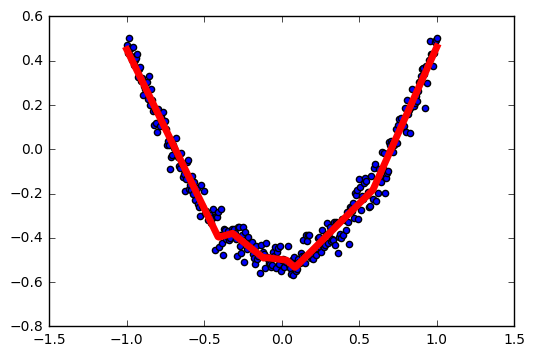

In [15]:
#notebook中无法更新 在windows中可以看到更新效果
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data2,y_data2)
plt.ion()
for i in range(1000):
    sess5.run(train_step,feed_dict={xs:x_data2,ys:y_data2})
    if i%100 == 0:
        try:
            ax.lines.remove(lines[0])
        except:
            pass
        predition_value = sess5.run(predition,feed_dict={xs:x_data2})
        lines = ax.plot(x_data2,predition_value,'r-',lw=5)
plt.show()
plt.pause(2)


In [145]:
def createDataset(path='./dataset.txt'):
    dataset = open(path,'r')
    datas = []
    labels = []
    for line in dataset.readlines():
        lineData = []
        lineData.append(float(line.split(' ')[0]))
        lineData.append(float(line.split(' ')[1]))
        labels.append([int(line.split(' ')[-1].strip())])
        datas.append(lineData)
    return datas,labels

In [146]:
datas,labels = createDataset()

In [147]:
datas = np.array(datas).astype(np.float32)
labels = np.array(labels).astype(np.float32)
labels

array([[ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.]], dtype=float32)

In [164]:
xs2 = tf.placeholder(tf.float32,[None,2])
ys2 = tf.placeholder(tf.float32,[None,1])

layer1 = add_layer(xs2,2,3,activation_function=tf.nn.sigmoid)
output = add_layer(layer1,3,1,activation_function=tf.nn.sigmoid)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys2-output),reduction_indices=[1]))
train_step2 = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [165]:
sessSelf = tf.Session()
sessSelf.run(init)

In [167]:
for i in range(100000):
    sessSelf.run(train_step2,feed_dict={xs2:datas,ys2:labels})
    if i%10000 == 0:
        print(sessSelf.run(loss,feed_dict={xs2:datas,ys2:labels}))
print('结果：',sessSelf.run(output,feed_dict={xs2:datas,ys2:labels}))

0.0597105
0.0494855
0.0477808
0.0470041
0.0465187
0.0461696
0.0458987
0.0456781
0.0454929
0.0453338
结果： [[  9.76624191e-01]
 [  9.75079462e-03]
 [  7.49337971e-01]
 [  1.69919040e-02]
 [  9.70479369e-01]
 [  1.69559389e-01]
 [  9.76167440e-01]
 [  9.29805517e-01]
 [  9.60485458e-01]
 [  9.36716676e-01]
 [  9.62624550e-01]
 [  9.74399924e-01]
 [  9.66353357e-01]
 [  9.29034889e-01]
 [  9.75644588e-01]
 [  9.58930731e-01]
 [  9.44359839e-01]
 [  5.11427526e-04]
 [  3.91804380e-03]
 [  9.25864756e-01]
 [  9.61177468e-01]
 [  8.94351959e-01]]
